# TP1 : Résolution approchée d'un problème de Cauchy

Soit $I \subset \mathbb{R}$ un intervalle et $f :I\times \mathbb{R}^d \rightarrow \mathbb{R}^d$ vérifiant les hypothèses du théorème de Cauchy-Lipschitz.
Pour $t_0 \in I$, on considère le problème de Cauchy $(P)$ :
$$
\left\lbrace
\begin{array}{l}
y'(t)  =f(t,y(t)) \: , \quad (E) \\
y(t_0) = y_\ast \in \mathbb{R}^d \text{ donné.}
\end{array} \right.
$$
Soit $y : J \subset I \rightarrow \mathbb{R}^d$ la solution maximale de $(P)$ et $[t_0,t_0 +T] \subset J$.
On veut approcher numériquement $y$ sur $[t_0,t_0 +T]$, connaissant $y_\ast = y(t_0)$ ou au moins une valeur approchée $y_0$ de $y_\ast$. Pour résoudre numériquement ce problème,  on se donne une subdivision 
$t_0 < t_1 <
. . . < t_N = t_0 + T$ de $[t_0, t_0 + T ]$ et
on cherche des valeurs approchées $y_1, \ldots, y_N$ de $y(t_1), \ldots, y(t_N)$, on définit ensuite une fonction $y_{h}^{app}$ continue sur $[t_0,t_0 +T]$ qui interpole linéairement $(t_0, y_0)$, ... $(t_N, y_N)$.

On renvoie au cours [C1EulerExplicite.pdf](https://ecampus.paris-saclay.fr/pluginfile.php/1670398/course/section/298646/C1EulerExplicite.pdf?time=1673948155994) pour l'étude théorique des schémas d'ordre 1 à pas constant. On va se concentrer dans un premier temps sur le schéma d'*Euler explicite* :
$$
\begin{cases} \tag{S}
y_{n+1}  = y_n + h f(t_n, y_n) \\
t_{n+1} = t_n + h \, ,
\end{cases}
$$

## Exercice 1.- Schéma d'Euler explicite 1d


1. \'Ecrire une fonction `euler1D` qui détermine la solution approchée 
 du problème de Cauchy par la méthode d'Euler explicite. Cette fonction aura comme arguments d'entrée :  `fun`, `y0`, `t0`, `T` et `h` où 

* `fun` désigne la fonction définissant le second membre de $(E)$, elle prendra comme arguments un réel $t$ et un réel $y$,
* `(t0,y0)` est la condition initiale, 
* `T` est la longueur de l'intervalle, de sorte que `$[t0,t0+T]$` est l'intervalle sur lequel on cherche à résoudre $(E)$,
* `h` est le pas de temps.

Votre fonction `euler1D` devra renvoyer une liste `[tps,sol]` où `tps` est le vecteur (de type `numpy array`) des temps $t_0, \ldots , t_N$ et `sol` est le vecteur  (de type `numpy array` également) des valeurs approchées $y_0, \ldots , y_N$.

On résume ci-après la structure attendue :
``` python
def euler1D(fun, t0, T, y0, h):
    tps = xxxx
    N = tps.size
    sol = np.zeros(N)
    sol[0]= xxxx
    for i in range(xx):
        xxxx
    return [tps, sol]
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.close("all") #ferme toutes les fenetres graphiques

In [2]:
""" A vous de jouer !
def euler1D(fun, t0, T, y0, h):
    tps = xxxx
    N = tps.size
    sol = np.zeros(N)
    sol[0]= xxxx
    for i in range(xx):
        xxxx
    return [tps, sol]
"""

' A vous de jouer !\ndef euler1D(fun, t0, T, y0, h):\n    tps = xxxx\n    N = tps.size\n    sol = np.zeros(N)\n    sol[0]= xxxx\n    for i in range(xx):\n        xxxx\n    return [tps, sol]\n'

2. Tester votre schéma d'Euler sur le problème
$$ \tag{$E_1$}
\left\lbrace \begin{array}{ll}
y'(t) & = -y(t) + t + 1\\
y(0) & = 1
\end{array} \right.
$$
dont on sait (n'est-ce pas ?!) calculer la solution exacte $y_e(t) = \exp(-t) + t$. On tracera sur une même figure la solution exacte et la solution approchée, sur l'intervalle $[0,2]$ obtenue pour `h = 0.2` puis `0.05`. *Il s'agit ici de comprendre qui est la fonction `fun` et la définir correctement*.

*Pratique :* vous pouvez récupérer directement `tps` et `sol` avec `tps,sol = euler1D(fun, t0, T, y0, h)`.

L'erreur de convergence (en norme sup) entre la solution exacte $y_e$ et la solution approchée $(y_n)_{n \leq N}$ calculée par le schéma d'Euler $(S)$ est donnée par
$$
e(h) := \max_{n=1, \ldots , N} \| y_e(t_n) - y_n \| \: .
$$

3. En vous appuyant sur le cours, justifier que dans le cas présent i.e. schéma d'Euler $(S)$ associé au problème de Cauchy $(E_1)$ sur l'intervalle $[0,2]$, l'erreur $e(h)$ tend vers $0$ quand le pas de discrétisation $h$ tend vers $0$.


4. Calculer $e(h)$ pour `h = 0.2` puis `h = 0.05`.

*Pratique :* on pourra utiliser la fonction `np.linalg.norm(u, np.inf)` qui renvoie prend en argument un `numpy array u` de taille `N` et renvoie $\max_{i=0, \ldots, N-1} |u[i]|$.

## Exercice 2.- Ordre des schémas

On reprend dans cet exercice le problème de Cauchy $(E_1)$ et on garde les paramètres de résolution `t0 = 0`, `T = 2` et `y0 = 1` tout au long de l'énoncé. On va comparer le schéma d'Euler déjà implémenté à l'exercice 1 avec le schéma du point milieu
$$
\begin{cases} 
   t_{n,2} = t_n +\frac{1}{2}h \\
   y_{n,2} = y_n + \frac{1}{2}h f(t_n, y_n)\\
   y_{n+1} = y_n + h f(t_{n,2}, y_{n,2})\\
   t_{n+1} = t_n +h.\\
\end{cases}
$$

1. En reprenant la structure de la fonction `euler1D`, écrire une fonction `pointMilieu1D` qui implémente le schéma du point milieu.

2. Représenter les solutions approchées obtenues en utilisant le schéma d'Euler explicite et le schéma du point milieu, ainsi que la solution exacte sur une nouvelle figure pour `h=0.2` par exemple.

On veut à présent étudier et comparer la décroissance de l'erreur $e(h)$ en fonction du pas de temps $h$ pour le schéma d'Euler et le schéma du point milieu. On définit pour cela un vecteur de pas de temps `vecth`$=[2^{-1}, \ldots, 2^{-9} ]$.

3. Pour $h \in$ `vecth`, calculer $e(h)$ et regrouper les valeurs obtenues dans un `numpy array E` tel que `E[i] = e(vecth[i])` pour `i = 0 ... 8`. Effectuer ce calcul pour le schéma d'Euler explicite puis pour le schéma du point milieu.

In [3]:
vecth = 0.5**np.arange(1,10) # vecteurs des pas de temps h
E1 = np.zeros(9) # e(h) pour Euler
E2 = np.zeros(9) # e(h) pour point milieu

4. En reprenant la preuve de la consistance su schéma d'Euler (Proposition 1), vérifier que le schéma du point milieu est consistant à l'ordre $2$ dans le cas présent (c'est plus généralement vrai dès que $f$ est de classe $\mathrm{C}^2$).

5. Toujours à l'aide du cours, en reprenant notamment la preuve du Théorème 1, vérifier que pour chacun des deux schémas (Euler et point milieu), il existe une constante $C > 0$ et un exposant $p \in \mathbb{N}^\ast$ tels que 
$$ \tag{1}
e(h) \leq C h^p \: .
$$
Que vaut $p$ pour chacun des deux schémas ? *Attention,* $e(h)$ n'est pas l'erreur de consistance.

On va vérifier numériquement la "prédiction théorique". Pour cela, on commence par représenter l'erreur $e(h)$ en fonction de $h$ pour chacun des deux schémas (on reprend les valeurs stockées dans les vecteurs `E1`et `E2`).

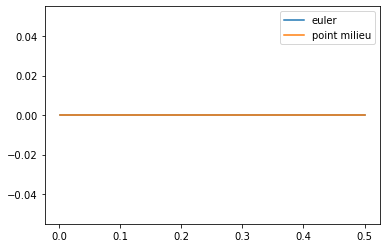

In [4]:
plt.figure()
plt.plot(vecth,E1,label='euler')
plt.plot(vecth,E2,label='point milieu')
plt.legend()

Afin de préciser l'ordre de convergence numérique observé, on va se placer en échelle logarithmique (c'est d'ailleurs pour cela qu'on a choisi pour le vecteur `vecth` des puissances successives de $0.5$). L'inégalité $(2)$ devient alors
$$
\ln e(h) \leq \ln C + p \ln h \: .
$$

6. Sur une nouvelle et même figure, représenter $e(h)$ en fonction de $h$ avec une échelle logarithmique sur chaque axe et pour chacun des deux schémas, on pourra utliliser la fonction `plt.loglog`.

Bien que $(2)$ ne soit a priori qu'une inégalité, sur la figure précédente, ce que vous observez ressemble à deux droites de pentes différentes. La fonction `np.polyfit` permet d'effectuer une régression comme le montre l'exemple suivant.

a=1.0086936856114253


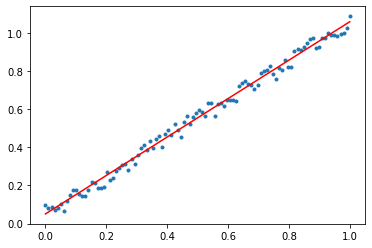

In [5]:
x = np.linspace(0,1,100)
y = x + 0.1*np.random.rand(100)
plt.plot(x,y,'.') # on représente les points d'abscisses x et d'oredonnées y

a,b = np.polyfit(x,y,1) # a : pente et b : ordonnée à l'origine de la droite de régression trouvée
print('a='+str(a))

yreg = a*x + b
plt.plot(x,yreg,'r') # droite de régression

7. Estimer la pente des droites obtenues en échelle logarithmique et en déduire l'ordre de convergence numérique observé pour chacun des deux schémas.

8. *Pour ceux qui ont le temps,* Reprendre l'étude en ajoutant le schéma de Runge-Kutta $4$
$$
\begin{cases} 
   t_{n,2}=t_{n}+\frac{h}{2}\\
   t_{n+1} = t_n + h\\
   y_{n,2}=y_n+\frac{h}{2}f(t_{n},y_n)\\
   y_{n,3}=y_{n}+\frac{h}{2}f(t_{n,2},y_{n,2})\\
   y_{n,4}=y_{n}+ h f(t_{n,2},y_{n,3})\\
   y_{n+1}=y_n+\frac{h}{6}\Big(f(t_{n},y_{n})+2f(t_{n,2},y_{n,2})+2f(t_{n,2},y_{n,3})
   +f(t_{n+1},y_{n,4})\Big).
\end{cases}
$$

## Exercice 3.- Consistance et stabilité : illustration

On reprend le problème de Cauchy $(E_1)$ et on va analyser les premières itérations du schéma d'Euler, pas à pas. On commence par représenter les erreurs liées à la consistance du schéma
$$
\tau_n(h) = y(t_{n+1}) - \left[ y(t_n) + h f (t_n, y(t_n)) \right] \quad \text{pour } n = 0 \ldots N-1 \: .
$$
On conservera les paramètres `t0 = 0` et `h=0.2` dans cet exercice.

1. Calculer $z_n = y(t_n) + h f (t_n, y(t_n))$ pour $n = 0, 1, 2$ et représenter sur une même figure la solution exacte et les points $(t_{n+1}, z_n)$.

2. Ajouter à cette figure la solution approchée donnée par le schéma d'Euler passant par les points $(t_n, y_n)$ pour $n = 0,1,2,3$.